# Plan
- step01(PASS) : deepseekocr로 table을 제외한 이미지 구역을 추출
- step02 : 이미지 구역에서 심볼을 기준으로 크롭하고 다음 단계로(sketch_detection_sysmbol_v1,v2)
- step03 :각 크롭한 이미지를 ocr로 텍스트 추출하기 : deepseekocr

### setting

In [1]:
import cv2, os
from symbol_region_splitter import match_symbol, split_and_extract_regions
from utils import visualize_detections, show_image_highres

from transformers import AutoModel, AutoTokenizer
import torch

### 테스트할 도면과 저장 위치 지정
image_file = '../data/hard_task_test01_v1.PNG'
output_path = './result'
symbol_path = '../data/symbol_mini.PNG'

# deepseekOCR 세팅
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
model_name = 'deepseek-ai/DeepSeek-OCR'

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name, trust_remote_code=True, use_safetensors=True)
# _attn_implementation='flash_attention_2' : 나중에 파이프라인 통합시 설치 필요
model = model.eval().cuda().to(torch.bfloat16)

# prompt = "<image>\nFree OCR. " # 무한 텍스트 추출 오류 이슈
prompt = "<image>\nExtract all text from this image as plain text."

/home/dibaeck/anaconda3/envs/proj_v4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### step01(방법 고안 필요)

### step02-03

탐지된 심볼 수 (중복 제거 후): 6


/home/dibaeck/anaconda3/envs/proj_v4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53456 (\N{HANGUL SYLLABLE TAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/anaconda3/envs/proj_v4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/anaconda3/envs/proj_v4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dibaeck/anaconda3/envs/proj_v4/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


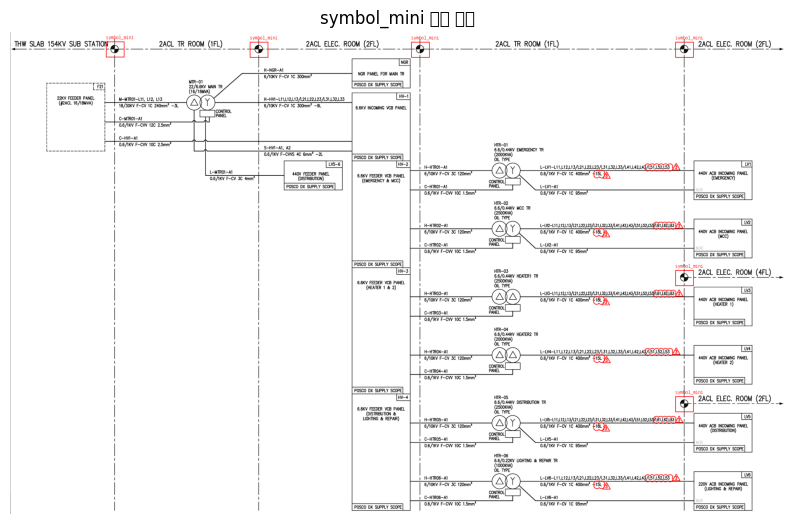

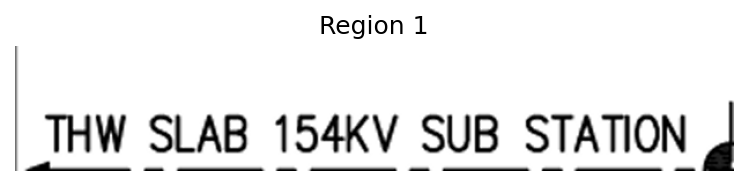

/home/dibaeck/anaconda3/envs/proj_v4/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_c

BASE:  torch.Size([1, 256, 1280])
NO PATCHES
THW SLAB 154KV SUB STATION
image size:  (622, 108)
valid image tokens:  44
output texts tokens (valid):  11
compression ratio:  0.25
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


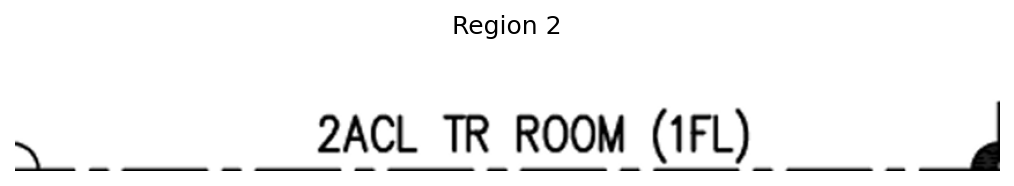

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
2ACL TR ROOM (1FL)
image size:  (852, 108)
valid image tokens:  832
output texts tokens (valid):  11
compression ratio:  0.01
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


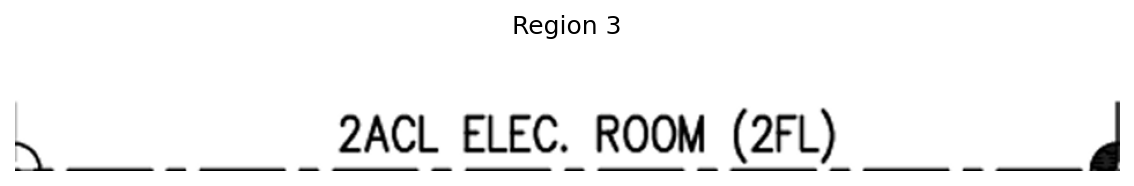

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
2ACL ELEC. ROOM (2FL)
image size:  (956, 108)
valid image tokens:  928
output texts tokens (valid):  13
compression ratio:  0.01
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


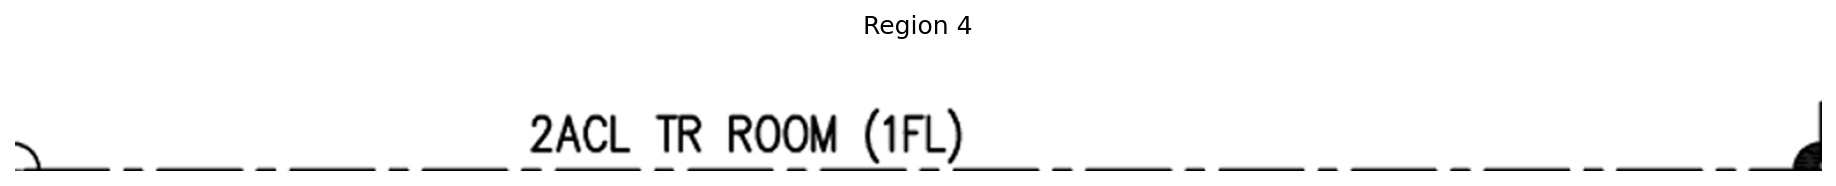

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
2ACL TR ROOM (1FL)
image size:  (1564, 108)
valid image tokens:  917
output texts tokens (valid):  11
compression ratio:  0.01
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


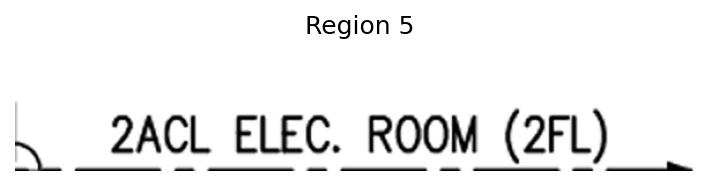

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
2ACL ELEC. ROOM (2FL)
image size:  (596, 108)
valid image tokens:  46
output texts tokens (valid):  13
compression ratio:  0.28
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


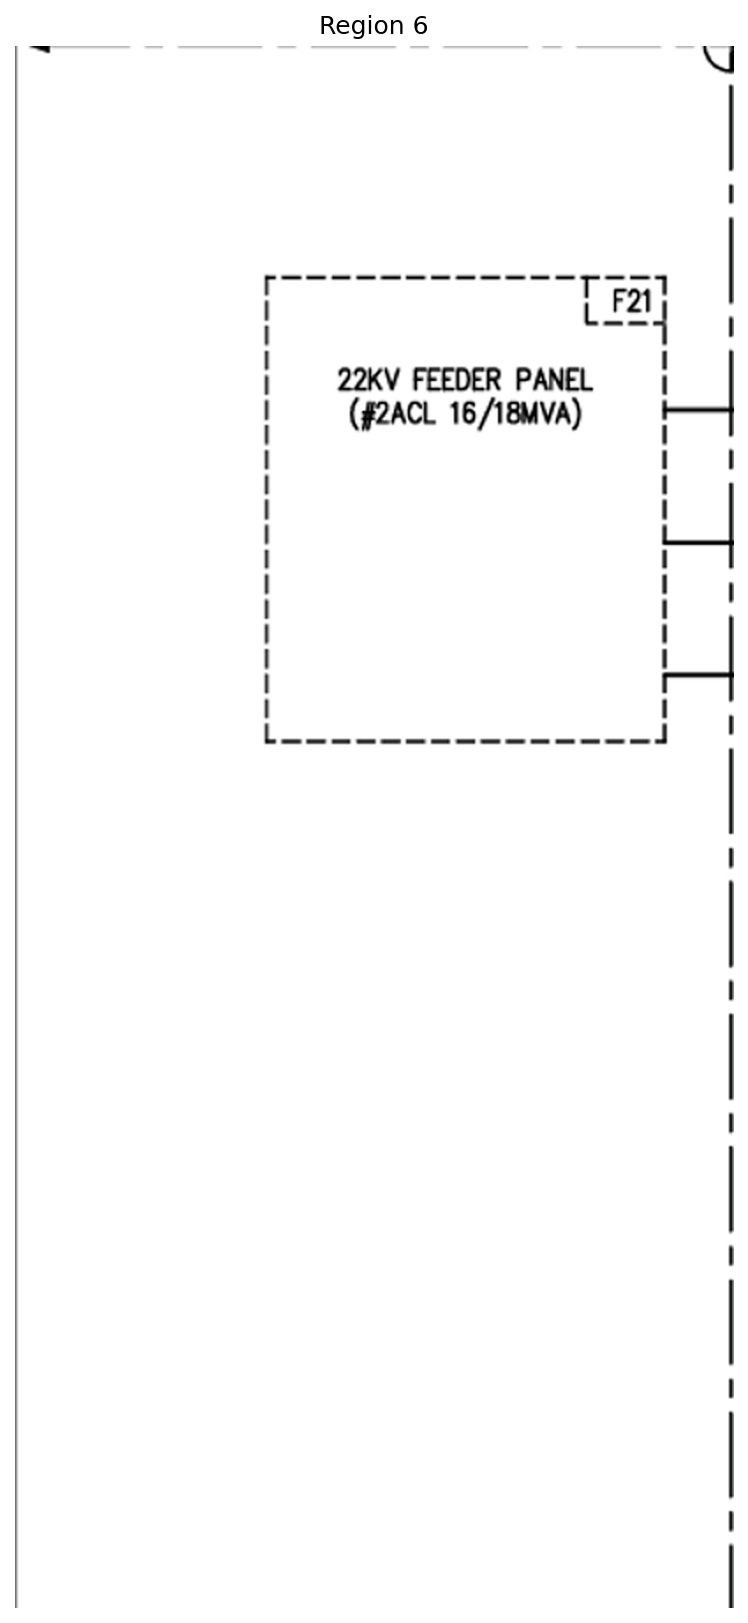

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
F21

22KV FEEDER PANEL

#2ACL 16/18MVA
image size:  (622, 1352)
valid image tokens:  317
output texts tokens (valid):  21
compression ratio:  0.07
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


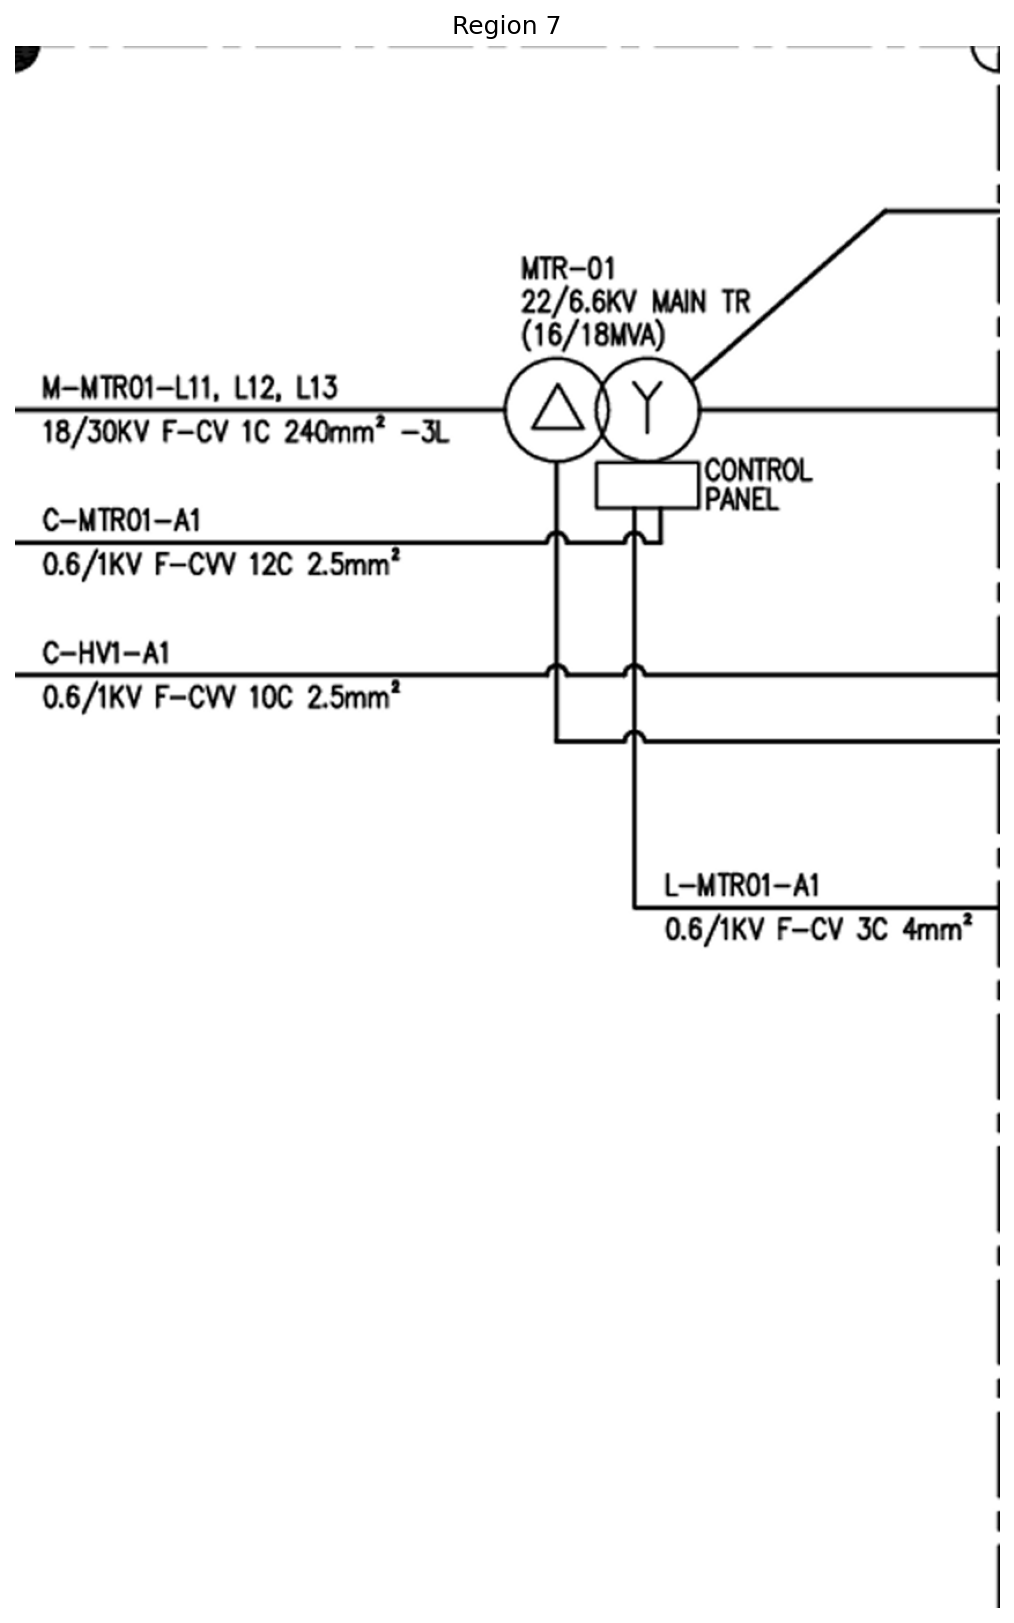

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
MTR-01

22/6.6KV MAIN TR

(16/18MVA)

M-MTR01-L11,L12,L13

18/30KV F-CV 1C 240mm2-3L

CONTROL

PANEL

C-MTR01-A1

0.6/1KV F-CV 12C 2.5mm2

C-HV1-A1

0.6/1KV F-CV 10C 2.5mm2

L-MTR01-A1

0.6/1KV F-CV 3C 4mm2
image size:  (852, 1352)
valid image tokens:  761
output texts tokens (valid):  132
compression ratio:  0.17
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


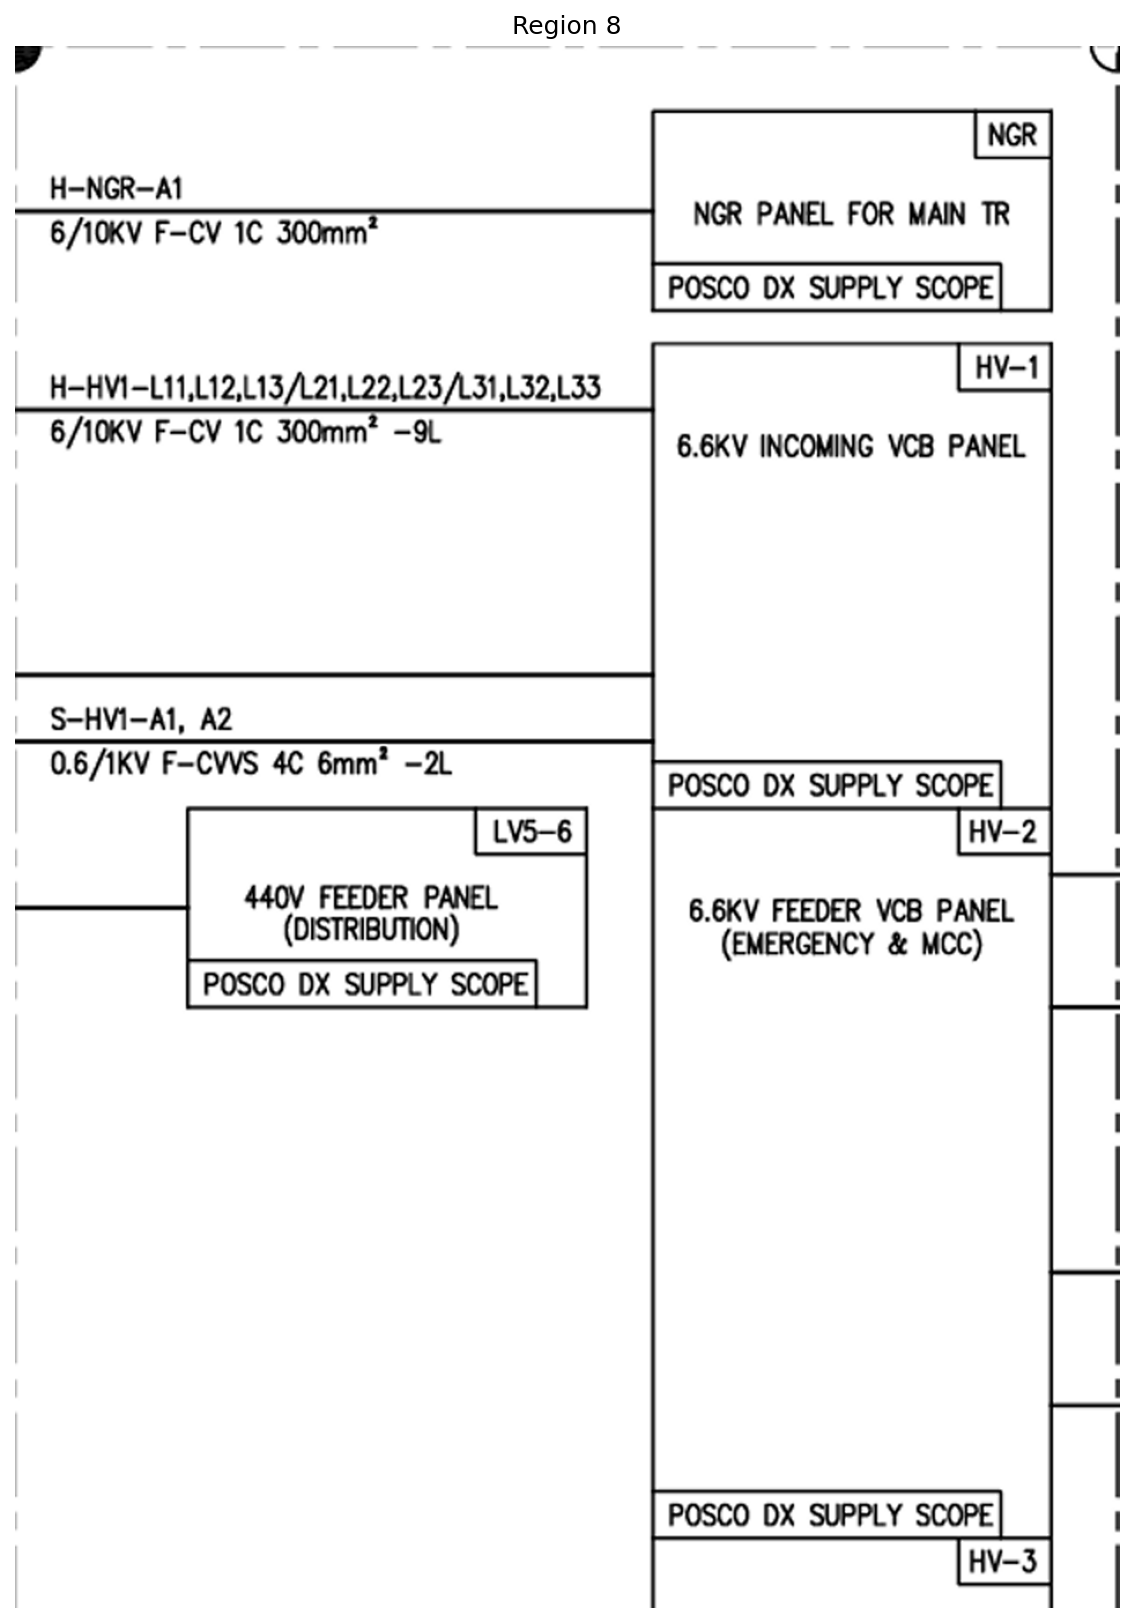

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
NGR

H-NGR-A1

NGR PANEL FOR MAIN TR

6/10KV F-CV 1C 300mm2

POSCO DX SUPPLY SCOPE

H-HV1-L11,L12,L13/L21,L22,L23/L31,L32,L33

HV-1

6/10KV F-CV 1C 300mm2-9L

6.6KV INCOMING VCB PANEL

S-HV1-A1,A2

0.6/1KV F-CVVS 4C 6mm2-2L

POSCO DX SUPPLY SCOPE

LV5-6

HV-2

440V FEEDER PANEL

(DISTRIBUTION)

6.6KV FEEDER VCB PANEL

EMERGENCY & MCC

POSCO DX SUPPLY SCOPE

POSCO DX SUPPLY SCOPE

HV-3
image size:  (956, 1352)
valid image tokens:  781
output texts tokens (valid):  197
compression ratio:  0.25
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


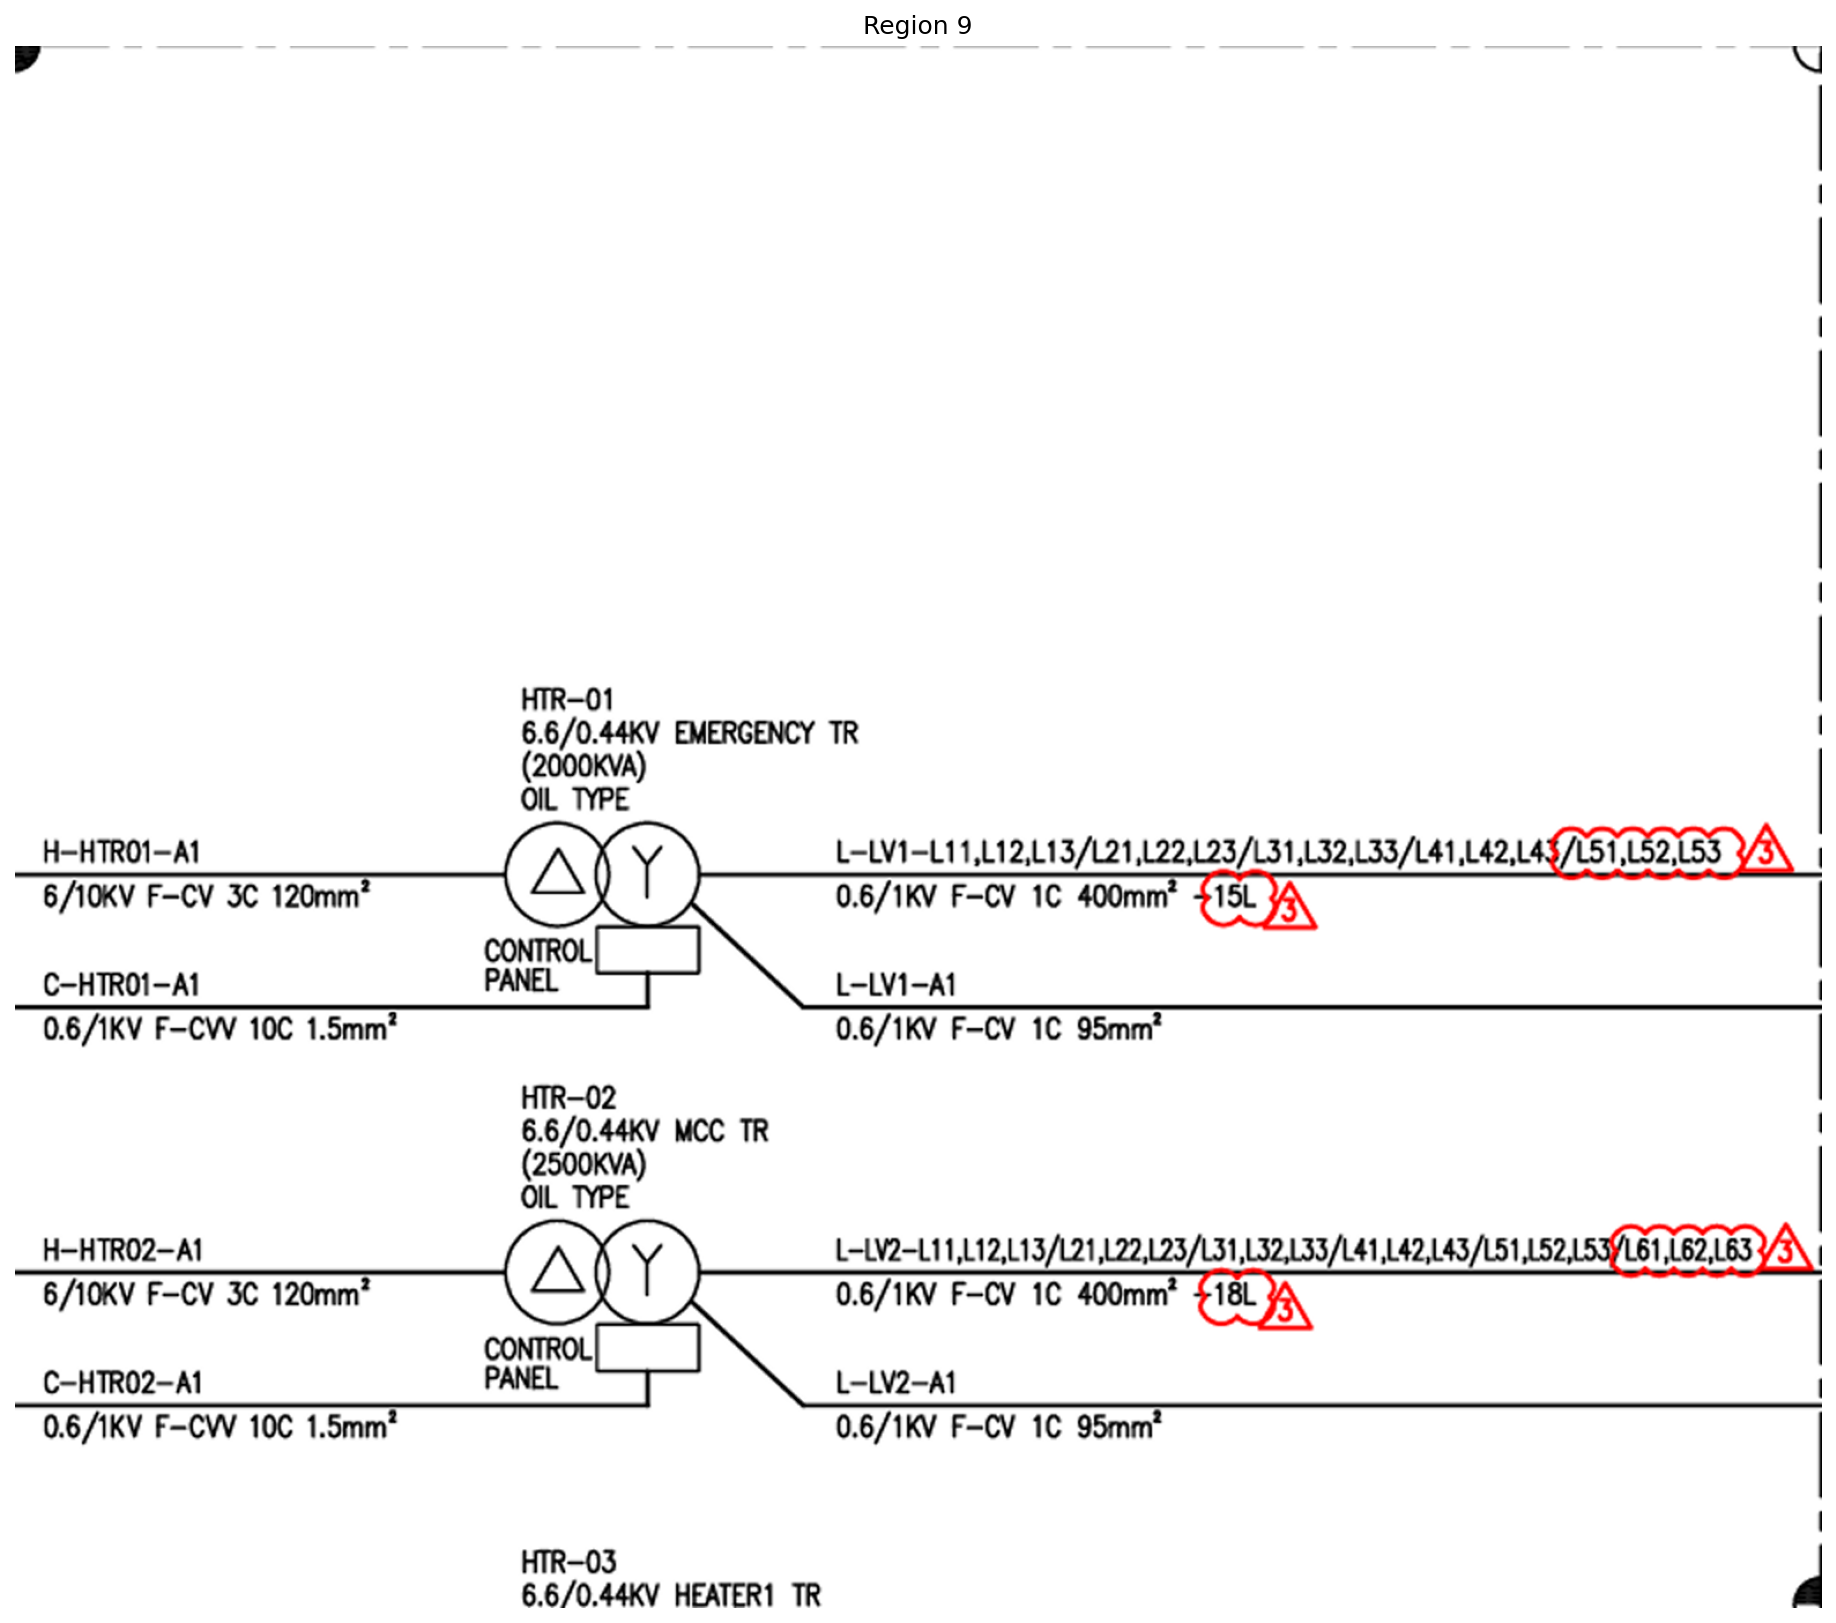

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
HTR-01

6.6/0.44KV EMERGENCY TR

(2000KVA)

OIL TYPE

H-HTR01-A1

L-LV1-L11,L12,L13/L21,L22,L23/L31,L32,L33/L41,L42,L43/L51,L52,L53

6/10KV F-CV 3C 120mm²

0.6/1KV F-CV 1C 400mm²

15L

CONTROL

C-HTR01-A1

PANEL

L-LV1-A1

0.6/1KV F-CV 10C 1.5mm²

0.6/1KV F-CV 1C 95mm²

HTR-02

6.6/0.44KV MCC TR

(2500KVA)

OIL TYPE

H-HTR02-A1

L-LV2-L11,L12,L13/L21,L22,L23/L31,L32,L33/L4L1,L42,L43/L51,L52,L53

6/10KV F-CV 30C 120mm²

0.6/1KV F-CV 1C 4O0mm²

18L

CONTROL

C-HTR02-A1

PANEL

L-LV2-A1

0.6/1KV F-CV 10C 1.5m

0.6/1KV F-CV 1C 95mm²

HTRO-03

6.6/0.44KV HEATER1 TR
image size:  (1564, 1352)
valid image tokens:  1121
output texts tokens (valid):  341
compression ratio:  0.3
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


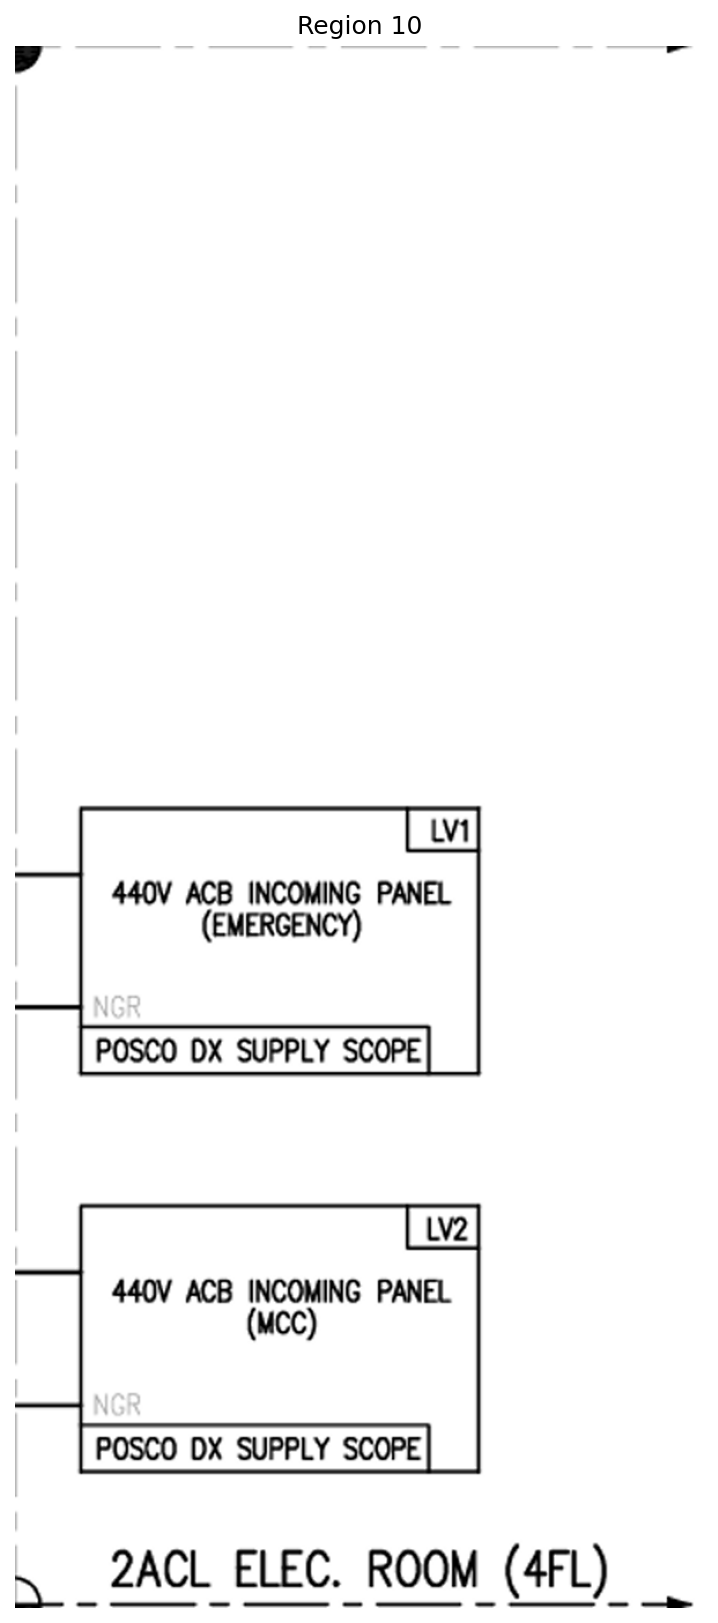

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
LV1

440V ACB INCOMING PANEL

(EMERGENCY)

NGR

POSCO DX SUPPLY SCOPE

LV2

440V ACB INCOMING PANEL

(MCC)

NGR

POSCO DX SUPPLY SCOPE

2ACL ELEC.ROOM (4FL)
image size:  (596, 1352)
valid image tokens:  312
output texts tokens (valid):  71
compression ratio:  0.23
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


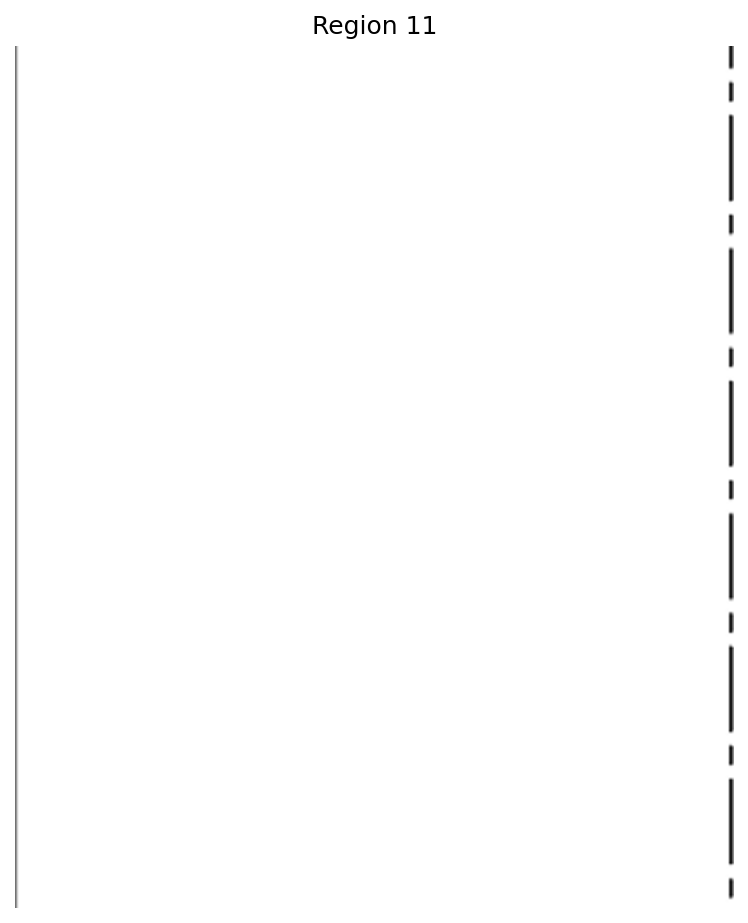

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([4, 100, 1280])
**TÁC NHÂN DÂN TỰ DO NGHIỆP VÀ ĐỘNG CƠ VÀ ĐỘNG CƠ VÀ ĐỘNG CƠ VỀ ĐỘNG CƠ VÀ ĐỘNG CƠ VÀ ĐÔNG CƠ VÀ ĐÔNG CƠ VÀ ĐÔNG CƯ VÀ ĐÔNG CƠ VÀ ĐÔNG CƠ VÀ ĐỘNG CƠ VÀ ĐÔNG CÔNG VÀ ĐÔNG CƠ VÀ ĐÔNG CƠ VÀ ĐƠNG CƠ VÀ ĐÔNG CƠ VÀ ĐÔNG CƢÀN VÀ ĐÔNG CƠ VÀ ĐÔNG CƠ VÀ ĐÒNG CƠ VÀ ĐÔNG CƠ VÀ ĐÔNG CƣÀN VÀ ĐÔNG CƠ VÀ ĐÔNG CƠ VỀ ĐÔNG CƠ VÀ ĐÔNG CƠ VÀ ĐÔNG VÀ ĐÔNG CƠ VÀ ĐÔNG CƠ VỀ VÀ ĐÔNG CƠ 

KeyboardInterrupt: 

In [2]:
# 이미지 로드
drawing = cv2.imread(image_file)
if drawing is None:
    raise FileNotFoundError(f"도면을 찾을 수 없습니다: {image_file}")
drawing_gray = cv2.cvtColor(drawing, cv2.COLOR_BGR2GRAY)

symbol_img = cv2.imread(symbol_path)
if symbol_img is None:
    raise FileNotFoundError(f"심볼 이미지를 찾을 수 없습니다: {symbol_path}")
symbol_gray = cv2.cvtColor(symbol_img, cv2.COLOR_BGR2GRAY)
symbol_name = os.path.splitext(os.path.basename(symbol_path))[0]


# 심볼 매칭 & 중복 제거 & 시각화
filtered_boxes = match_symbol(drawing_gray, symbol_gray, threshold=0.75)
visualize_detections(drawing, filtered_boxes, symbol_name)

# 중심 좌표 계산
centers_x = [(x1 + x2)//2 for (x1, y1, x2, y2) in filtered_boxes]
centers_y = [(y1 + y2)//2 for (x1, y1, x2, y2) in filtered_boxes]

# 영역 분할 & (off)확대 ROI 시각화
regions = split_and_extract_regions(drawing, centers_x, centers_y, fallback=20, zoom_factor=2.0)

# ROI 저장 및 OCR 수행
ocr_results = {}

for region_id, roi in regions:
    # ROI 시각화
    show_image_highres(roi, f"Region {region_id}", zoom=1.0, dpi=150)

    # OCR 수행
    roi_folder = os.path.join(output_path, f'region_{region_id}')
    os.makedirs(roi_folder, exist_ok=True)
    roi_file = os.path.join(roi_folder, f'roi_{region_id}.png')
    cv2.imwrite(roi_file, roi)

    res = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=roi_file,
        output_path=roi_folder,
        base_size=1024,
        image_size=640,
        crop_mode=True,
        save_results=True,
        test_compress=True
    )
    ocr_results[region_id] = res